### 100DaysOfMLCode


### Day 3- Using classification

MNIST Dataset- which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled withthe digit it represents. This set has been studied so much that it is often called the “Hello World” of Machine Learning.

#### Importing data and Library

In [17]:
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [18]:
mnist= fetch_mldata('MNIST original')

In [19]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [20]:
### assigning target and data variable
X,y= mnist['data'],mnist['target']

In [21]:
X.shape

(70000, 784)

In [22]:
y.shape

(70000,)

In [23]:
sample_digit=X[36000]

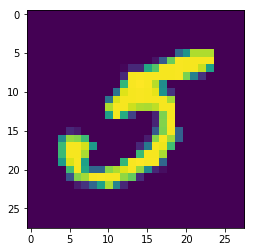

In [24]:
plt.imshow(sample_digit.reshape(28,28))

In [12]:
###Creating train- test data

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [14]:
###Shuffling data
shuffled_index= np.random.permutation(len(X_train))

In [25]:
shuffled_index

array([16844, 21645, 36581, ..., 58806, 47759, 27317])

In [26]:
X_train,y_train= X_train[shuffled_index],y_train[shuffled_index]

In [27]:
#### Creating a binary classifier 5- Ditector

y_train_5= (y_train==5)
y_test_5= (y_test==5)

In [28]:
y_train_5

array([False, False, False, ..., False, False, False])

In [29]:
###Training the model

from sklearn.linear_model import SGDClassifier
sgd_clf= SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

C:\Users\Bhauryal\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [31]:
sgd_clf.predict([sample_digit])

array([ True])

In [70]:
####Check the model Accuracy using cross validationn
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5, cv=5,scoring='accuracy')

C:\Users\Bhauryal\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Bhauryal\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Bhauryal\Anaconda

array([0.92658945, 0.93466667, 0.96458333, 0.964     , 0.93549462])

Althaugh the accuracy is about 93%. but this is not a very good measure for model selectionn.Accuracy is not the preferred method when data is skewed.

In [71]:
#### Using confusion metrix

from sklearn.model_selection import cross_val_predict
y_train_5_pred= cross_val_predict(sgd_clf,X_train,y_train_5, cv=5)

C:\Users\Bhauryal\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Bhauryal\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Bhauryal\Anaconda

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_5_pred)

array([[52023,  2556],
       [  740,  4681]], dtype=int64)

In [73]:
####using precision, recall and F1Score for accuracy measure
from sklearn.metrics import precision_score,recall_score,f1_score,fbeta_score
precision_score(y_train_5,y_train_5_pred)

0.6468149785822854

In [74]:
recall_score(y_train_5,y_train_5_pred)

0.8634938203283528

In [75]:
f1_score(y_train_5,y_train_5_pred)

0.739611313003634

In [ ]:
#### Creatinng precision recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
y_score=cross_val_predict(sgd_clf,X_train,y_train_5,cv=5,method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_score)

In [63]:
###ploting the precision recall curve
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    fig=plt.gcf()
    fig.set_figwidth(12)
    fig.set_figheight(6)

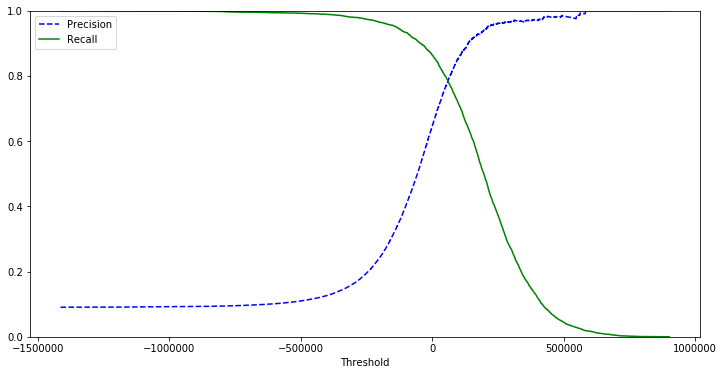

In [64]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)


By looking abobe graph we can choose correct precison or recall value.

In [65]:
####ROC Curve
from sklearn.metrics import roc_curve,roc_auc_score

fpr,tpr,thresholds=roc_curve(y_train_5,y_score)

In [68]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    fig=plt.gcf()
    fig.set_figwidth(12)
    fig.set_figheight(6)

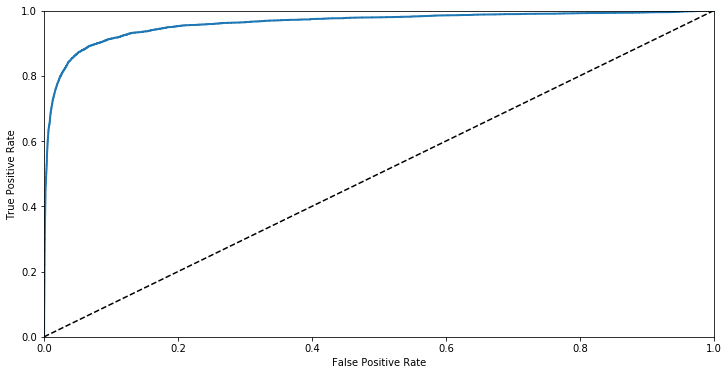

In [69]:
plot_roc_curve(fpr, tpr)

### Using random forest clasification

In [76]:
from sklearn.ensemble import RandomForestClassifier
forest_clf= RandomForestClassifier(random_state=42)
y_score_5_forest= cross_val_score(forest_clf,X_train,y_train_5)


In [77]:
y_score_5_forest

array([0.98465, 0.9829 , 0.9827 ])

In [83]:
y_prob_5_forest= cross_val_predict(forest_clf,X_train,y_train_5,method='predict_proba')
y_score_forest=y_prob_5_forest[:,1]

In [86]:
fpr_forest,tpr_forest,thresholds_forest= roc_curve(y_train_5,y_score_forest)

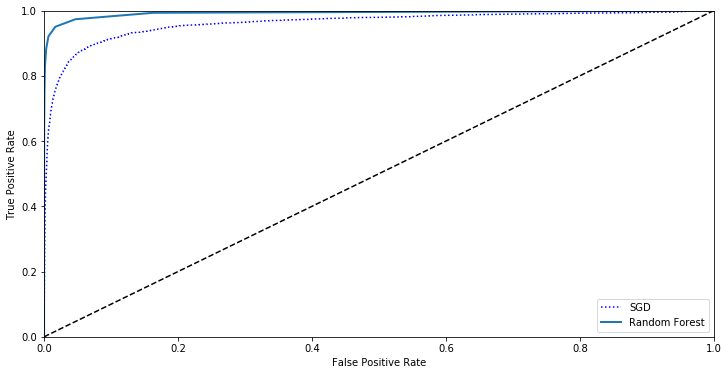

In [88]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")